# Numerical Solution 
Most popular methods for solution of advection equation are 
1. Finite Difference 
2. Finite Volume 
3. Discontinuous Galerkin 
4. Residual Distribution Methods.
We will use Finite difference as it will allow us to quickly develop codes for the solution and learn some important concepts. 
## Numerical solution Linear Advection Equation
This equation describes the passive advection of some scalar field $u(x,t)$ carried along by a flow of constant speed $a$. Which in one dimension takes the form
$$
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
$$


3. In simple finite difference method, the domain is divided set of equispaced points called grid points, $x_i$. We assume the solution value $u_i$ corresponding to each grid point $x_i$. At each grid points, rhs term of advection equation can be replaced with difference between neighboring points, using the classical defination of derivative of a function. We use subscript $i$ for spatial grid location. The subscript $n$ is used for the time level. 
  

!["Picture showing the finite difference mesh" ](pic1.png "Title") 
<b>Image Credits - Fig.2 - 4K Mountains Wallpaper</b>|
For LHS, we can simply  use difference between  past value of solution $(n-1)$ and present value of solution $n$ or we can use difference between future value of solution $(n+1)$ and future value $n$ of solution 


Using this we can approximate the advection equation using different finite differnce schemes.
1. First one is forward derivative in time and in space we use central differnce (FTCS)
$$\frac{u_i^{n+1} - u_i^{n} }{\Delta t} + C \cdot \frac{u_{i+1}^{n} - u_{i-1}^{n} }{2*dx} = 0$$  

By rearraging the terms we write solutions at Future time ($u_{n+1}$) in some linear combination of solutins of present time $u_{n}$:
$$u_i^{n+1} = u_i^{n}  - a\frac{ \Delta t}{2* dx} ( u_{i+1}^{n} - u_{i-1}^{n} ) $$  
In the above expression term $a\frac{ \Delta t}{\Delta h}$ is called  Courant–Friedrichs–Lewy condition, CFL in short. Which we will use extensively in CFD simulations.  CFL condition expresses that the distance that any information travels during the time step length within the mesh must be lower than the distance between mesh elements. In other words, information from a given cell or mesh element must propagate only to its immediate neighbor.
For successful CFD simulations CFL < 1.  IF CFL < 1, then $\Delta t < a* \Delta x$ , time taken by advection field $u$ to cover the distance of $\Delta  h$ will be smaller than $\Delta t$,

## FTCS implementation
Given 1D domain of length L bounded between left boundary $x_l$ and right boundary $x_r$ and a wave with speed $C=0.5$ is travelling in the +ve direction. Lets solve for $Nx=101$ grid points and time step $\delta t = 0.04$ 
Lets divide domain in Nx, number of grid points, distance between grid points is 
$$dx = \frac{xr -xl}{N-1}$$

FTCS is a explicit method because the value at the new time level depends only on quantities at the old time step explicit method.

We start our solution with some initial conditon and we solve above equation for getting the future soultions. The imposed intial condition solution is 
$$ u_{0}(x) = exp(-\frac{1}{2}(\frac{x}{0.4})^2) $$
The bounday conditions imposed are of periodic i.e. 
$$ u(-2, t) = u(2,t) $$
Thex exact solutions of above problem obtainted thourh method of characteristics is
$$
u(x, t) = exp(-\frac{1}{2} (\frac{x-at}{0.4})^2)$$


<figure>
<img src="ftcs.png" alt="Trulli" style="width:50%">
<figcaption align = "center"><b>Schematic visualization of the FTCS method. </b></figcaption>
</figure>

<figure>
<img src="ftcs-for.png" alt="Trulli" style="width:50%">
<figcaption align = "center"><b>. </b></figcaption>
</figure>



In [55]:
# lets implement in python, if you don't have experience in python
# You simply use declared the function with appropriate arguments .


import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':14})

#===============================================================
# Input Parameters
#===============================================================

Nx = 101;                       # Number of grid points in 1D domain whose left bounday is Xl and right boundary is Xr
Xr = 2.;                        # Domain limit to the right
Xl = -2.;                       # Domain limit to the left
T = 1.5;                          # Total Time of evolution
dt = 0.04                       # Time step
a = -0.5;                          # Speed of Advection

##########################################################
# Forward Time Centered Space
############################################################

def ForwarTimeCenteredSpace(Xl, Xr, Nx, T, dt, a):
    dx = (Xr-Xl)/(Nx-1)           # Size of single element of mesh
    x = np.linspace(Xl, Xr, Nx)    # 1D Mesh grid  
    Nt = int(T/dt)                 # time steps vector
    t = np.linspace(0.,T,Nt+1)

    CFL = a*dt/dx                     # CFL number
    U = np.zeros((Nt+1,Nx))           # Solution Matrix, nth row  of matrix contains, solution at nth time steps 
    U[0,:] = np.exp(-0.5*(x/0.4)**2)  # Initial solution
    
    for n in range (0,Nt):
        for i in range (1 , Nx-1):
            U[n+1,i] = U[n,i] - 0.5*CFL*(U[n,i+1]-U[n, i-1]);
        U[n+1, Nx-1] = U[n+1, 0];
    return U



def Exact_sol(Xl, Xr, Nx, T, dt, a, U):
    dx = (Xr-Xl)/(Nx-1)           # Size of single element of mesh
    x = np.linspace(Xl, Xr, Nx)    # 1D Mesh grid  
    Nt = int(T/dt)                 # time steps vector
    t = np.linspace(0.,T,Nt+1)

    CFL = a*dt/dx                     # CFL number
    Uex = np.zeros((Nt+1,Nx))         # Matrix for dumping exact solution at each time step
    Uex[0, :] = U[0,:]                # Exact solution at the beginning  

    errL2 =  np.zeros((Nt+1))
    
    for n in range (0,Nt):       
        d = a*(n+1)*dt
        Uex[n+1,:] = np.exp(-0.5*(np.mod(x-d+ Xr, 4)- Xr)**2/0.4**2)
        errL1 = U[n+1, :] - Uex[n+1, :]
        errL2[n+1] = np.linalg.norm(errL1)
    return Uex, errL2
    



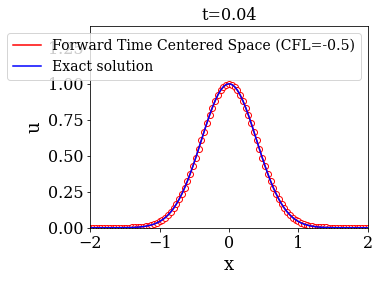

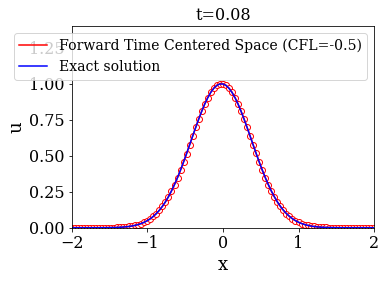

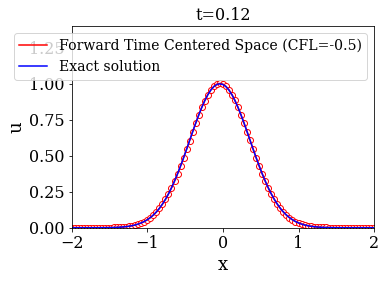

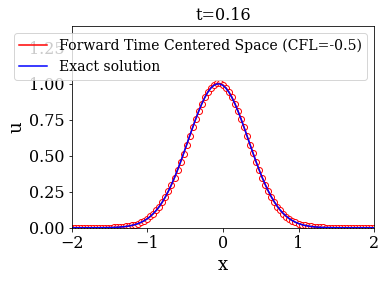

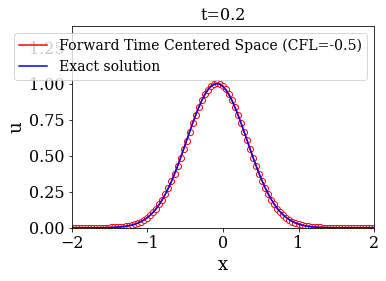

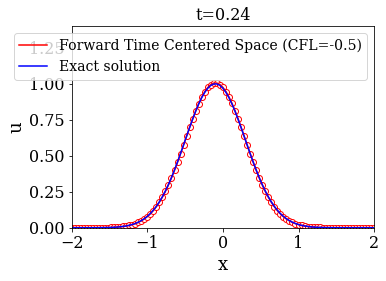

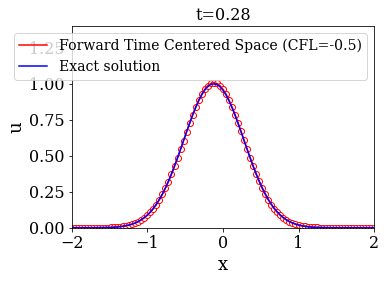

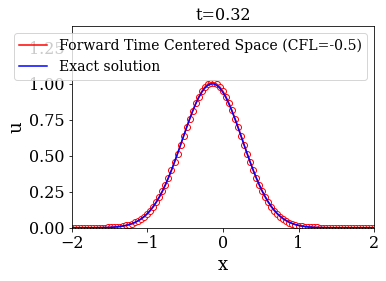

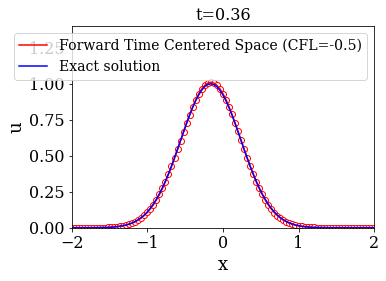

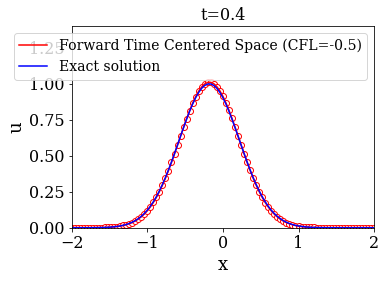

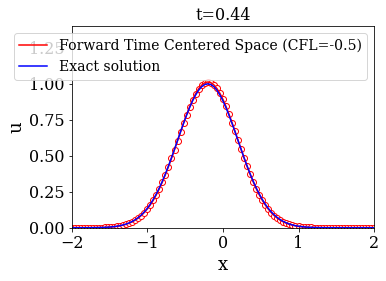

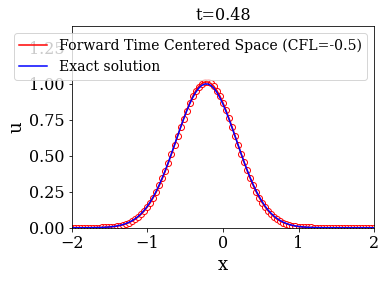

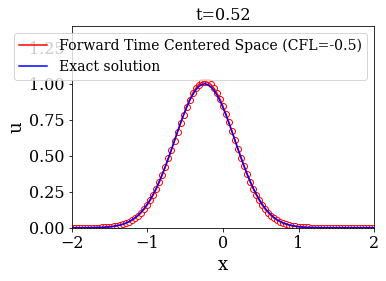

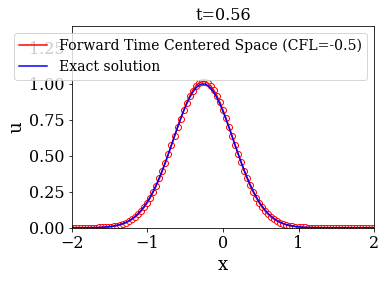

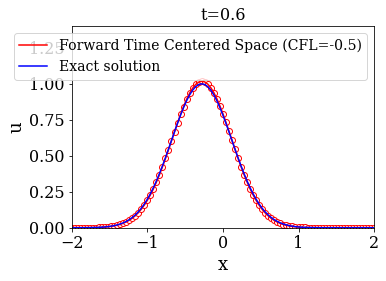

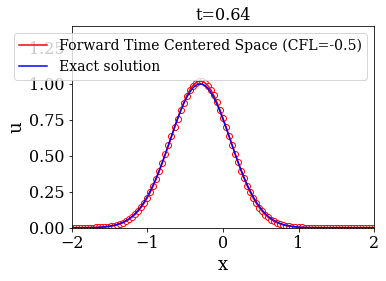

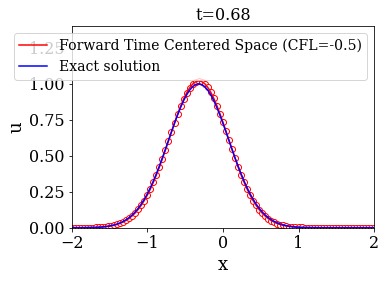

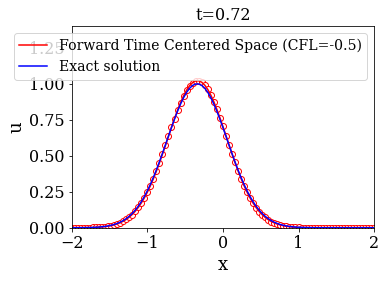

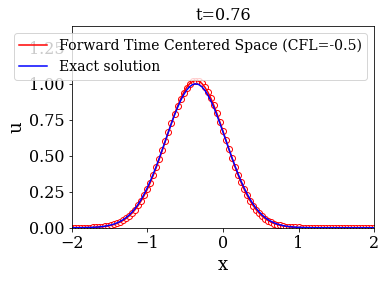

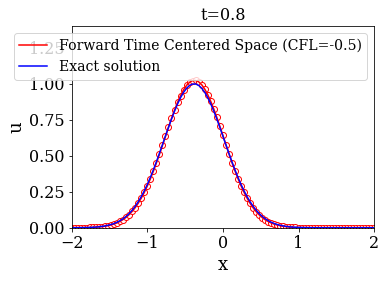

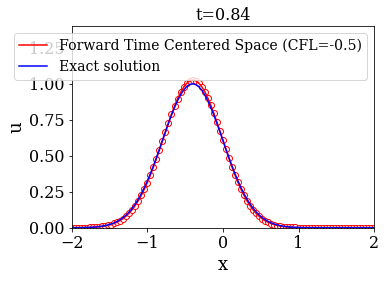

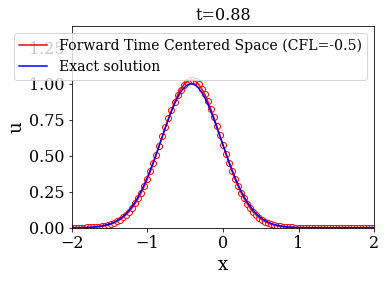

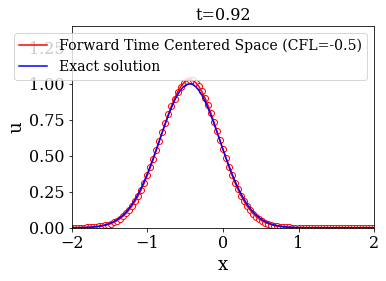

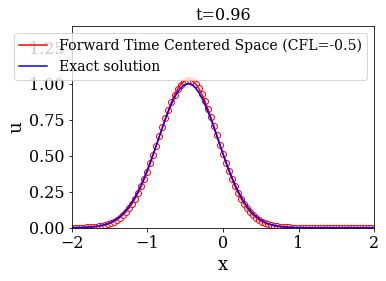

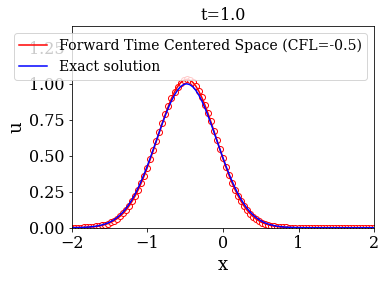

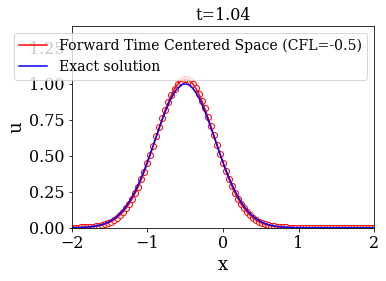

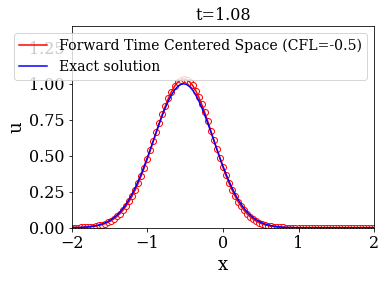

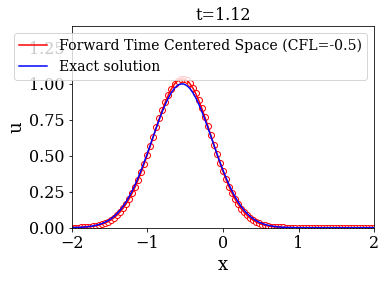

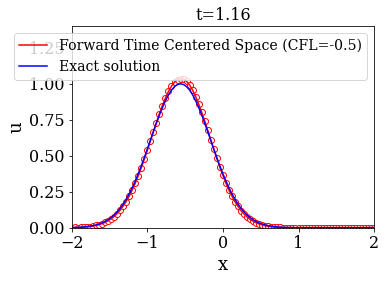

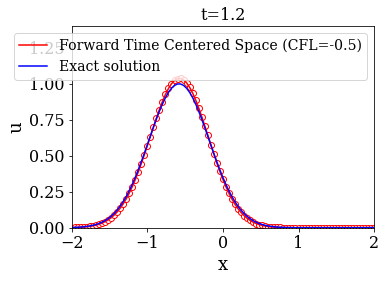

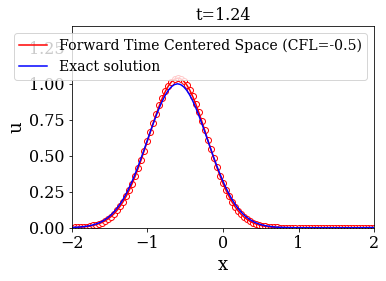

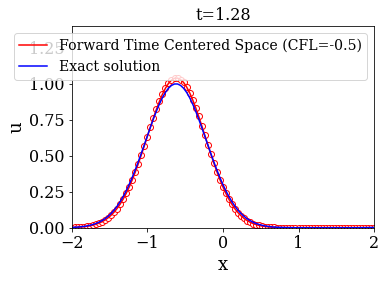

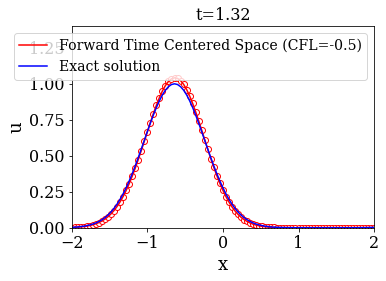

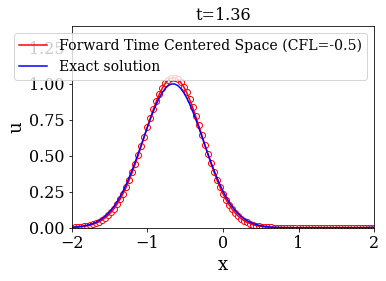

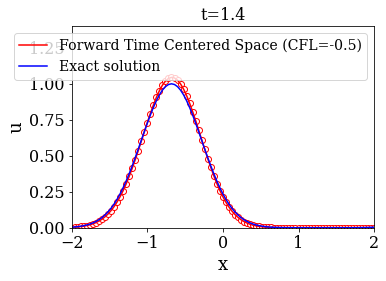

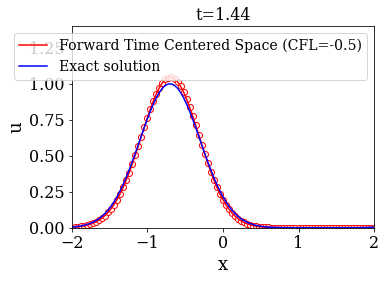

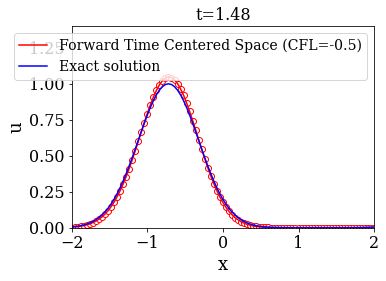

In [56]:
U= ForwarTimeCenteredSpace(Xl, Xr, Nx, T, dt, a)

[Uex, errL2] = Exact_sol(Xl, Xr, Nx, T, dt, a, U)
dx = (Xr-Xl)/(Nx-1)           # Mesh size
x = np.linspace(Xl, Xr, Nx)
CFL = a*dt/dx 
Fequency = 10; # HOW OFTEN you want to SHOW plots On screen, More often means more run time. 
for n in range (0, int(T/dt), Frequency):
    if (n==0): fig, ax = plt.subplots(figsize=(5.5,4))
    plt.clf()
    plt.plot(x,U[n,:], color='r')
    plt.plot(x,Uex[n,:], color='b')
    plt.scatter(x, U[n, :], marker='o', facecolors='white', color='r')

  #  plt.scatter(x,Uex[n, :], marker='o', facecolors='white', color='k')
    plt.gca().legend(('Forward Time Centered Space (CFL='+str(CFL)+')','Exact solution'))
    plt.axis([Xl, Xr, 0, 1.4])
    plt.title('t='+str(round(dt*(n+1),3)),fontsize=16)
    plt.xlabel('x',fontsize=18)
    plt.ylabel('u',fontsize=18)
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.18)
    plt.draw()
    #plt.pause(0.001)

    plt.show()

fig.savefig("FTCS-figure.pdf", dpi=300)


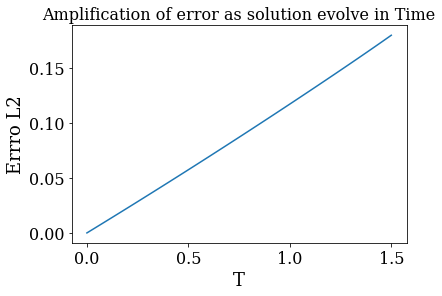

In [68]:
plt.title('Amplification of error as solution evolve in Time',fontsize=16)
plt.xlabel('T',fontsize=18)
plt.ylabel('Errro L2',fontsize=18)
plt.plot(np.linspace(0, T, len(errL2)), errL2)
plt.show()



## Upwind implementation
Consider a typical grid point $i$ in the domain. In a one-dimensional domain, there are only two directions associated with point $i$ – left (towards negative infinity) and right (towards positive infinity). If $a$ is positive, the traveling wave solution of the equation above propagates towards the right, the left side of $i$ is called upwind side and the right side is the downwind side. Similarly, if $a$ is negative the traveling wave solution propagates towards the left, the left side is called downwind side and right side is the upwind side. 

<figure>
<img src="upwind.png" alt="Trulli" style="width:100%">
<figcaption align = "center"><b>Schematic visualization of the first-order upwind methods. (a) Upwind scheme for
$c > 0$. (b) Upwind scheme for $c < 0$. </b></figcaption>
</figure>


<figure>
<img src="upwind-f2.png" alt="Trulli" style="width:50%">
<figcaption align = "center"><b> </b></figcaption>
</figure>

<figure>
<img src="upwind-f1.png" alt="Trulli" style="width:50%">
<figcaption align = "center"><b> </b></figcaption>
</figure>


In [65]:
#===============================================================
# Input Parameters
#===============================================================

Nx = 101;                       # Number of grid points in 1D domain whose left bounday is Xl and right boundary is Xr
Xr = 2.;                        # Domain limit to the right
Xl = -2.;                       # Domain limit to the left
T = 1.5;                          # Total Time of evolution
dt = 0.04                       # Time step
a = -0.5;                          # Speed of Advection


##########################################################
# Upwind method
############################################################

def Upwind(Xl, Xr, Nx, T, dt, a):
    dx = (Xr-Xl)/(Nx-1)           # Size of single element of mesh
    x = np.linspace(Xl, Xr, Nx)    # 1D Mesh grid  
    Nt = int(T/dt)                 # time steps vector
    t = np.linspace(0.,T,Nt+1)

    CFL = a*dt/dx                     # CFL number
    U = np.zeros((Nt+1,Nx))           # Solution Matrix, nth row  of matrix contains, solution at nth time steps 
    U[0,:] = np.exp(-0.5*(x/0.4)**2)  # Initial solution
   
    if( a > 0):
        for n in range (0, Nt):
            for i in range (1 , Nx):
                U[n+1,i] = U[n,i] - CFL*(U[n,i]-U[n, i-1]);
            U[n+1, Nx-1] = U[n+1, 0];
        
        
        
    if( a < 0):
        for n in range (0, Nt):
            for i in range (1 , Nx-1):
                U[n+1,i] = U[n,i] - CFL*(U[n,i+1]-U[n, i]);

            U[n+1, Nx-1] = U[n+1, 0];
    
    return U

def Exact_sol(Xl, Xr, Nx, T, dt, a, U):
    dx = (Xr-Xl)/(Nx-1)           # Size of single element of mesh
    x = np.linspace(Xl, Xr, Nx)    # 1D Mesh grid  
    Nt = int(T/dt)                 # time steps vector
    t = np.linspace(0.,T,Nt+1)

    CFL = a*dt/dx                     # CFL number
    Uex = np.zeros((Nt+1,Nx))         # Matrix for dumping exact solution at each time step
    Uex[0, :] = U[0,:]                # Exact solution at the beginning  

    errL2 =  np.zeros((Nt+1))
    
    for n in range (0,Nt):       
        d = a*(n+1)*dt
        Uex[n+1,:] = np.exp(-0.5*(np.mod(x-d+ Xr, 4)- Xr)**2/0.4**2)
        errL1 = U[n+1, :] - Uex[n+1, :]
        errL2[n+1] = np.linalg.norm(errL1)
    return Uex, errL2


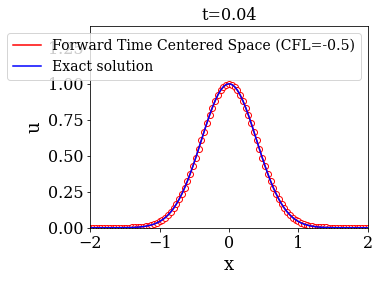

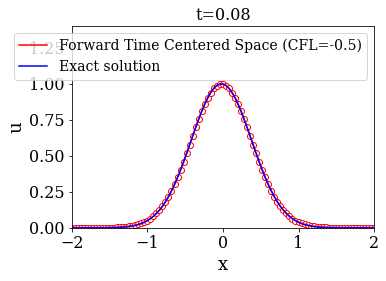

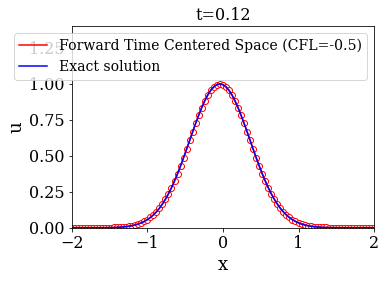

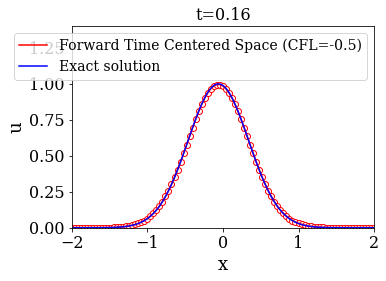

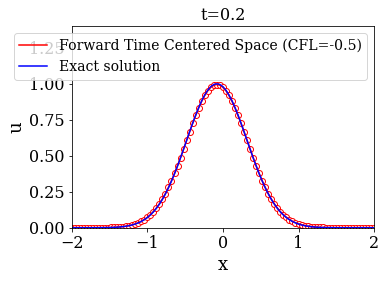

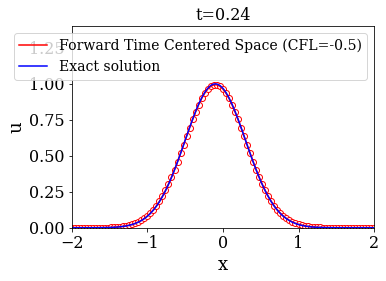

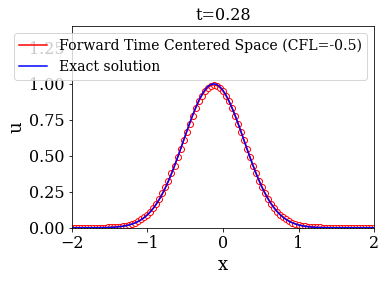

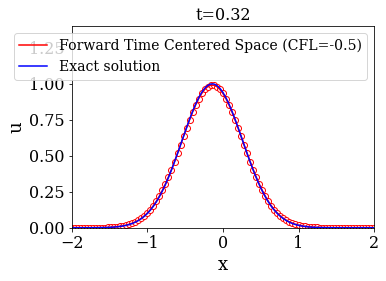

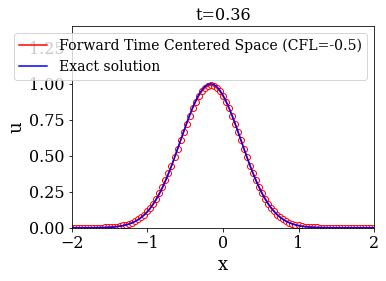

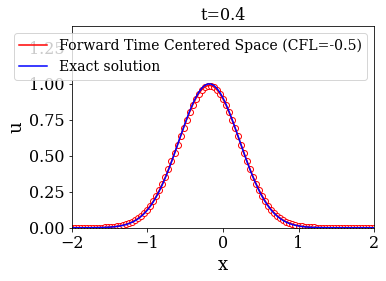

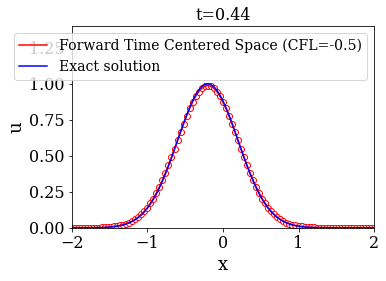

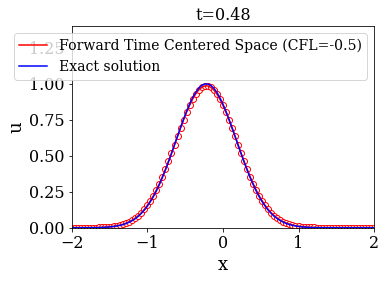

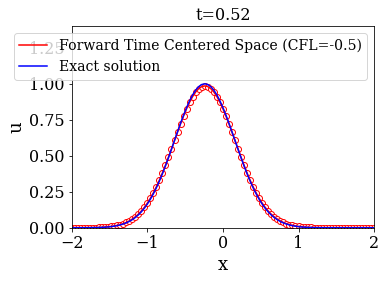

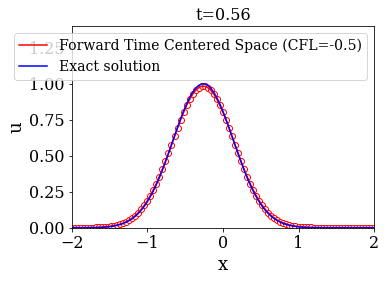

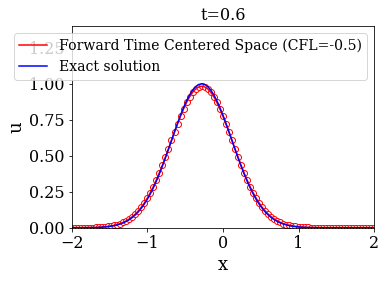

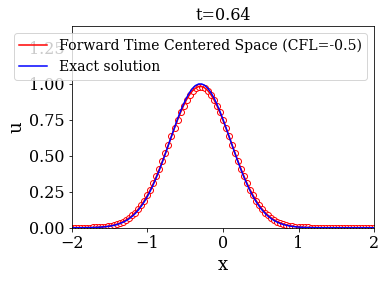

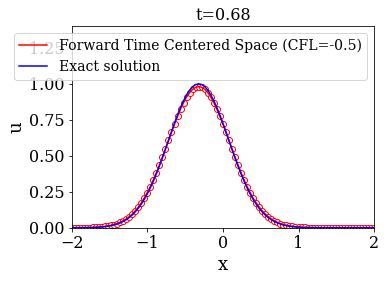

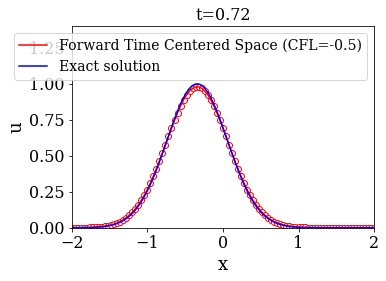

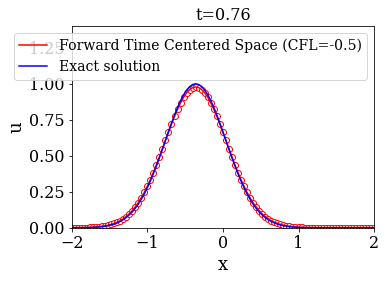

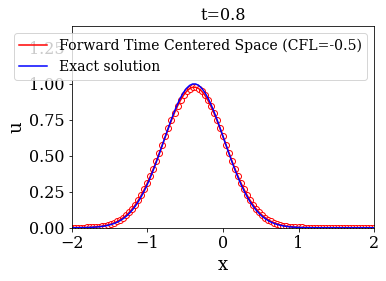

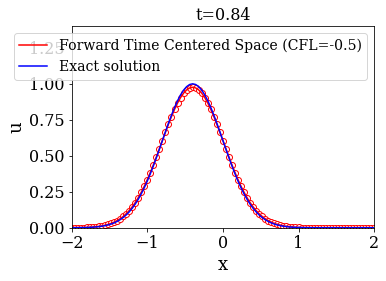

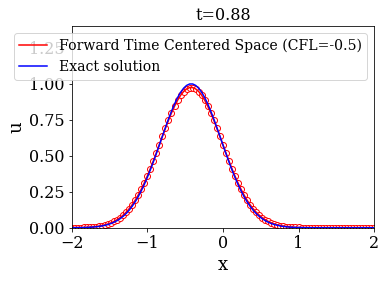

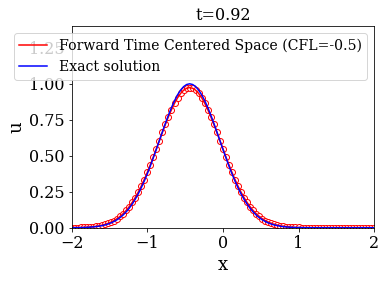

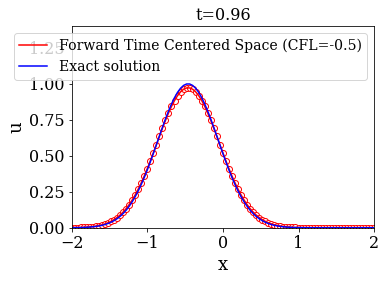

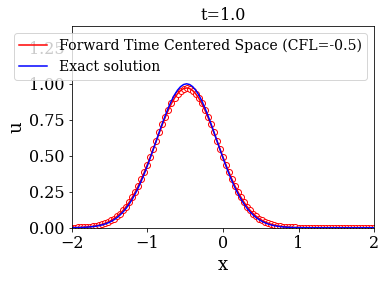

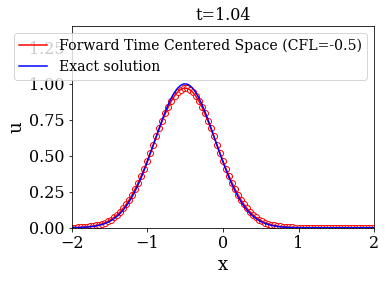

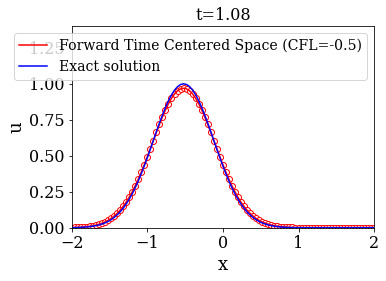

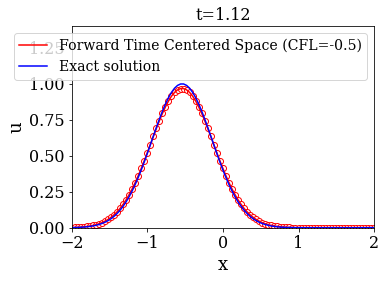

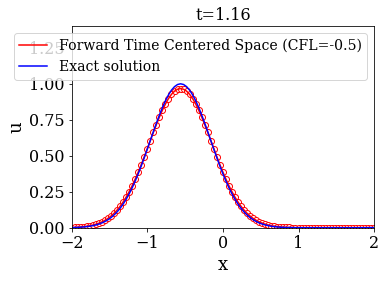

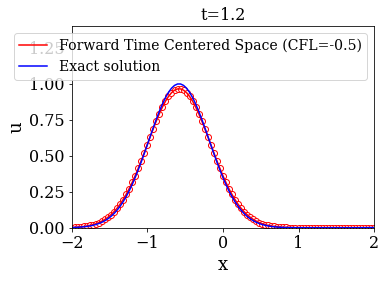

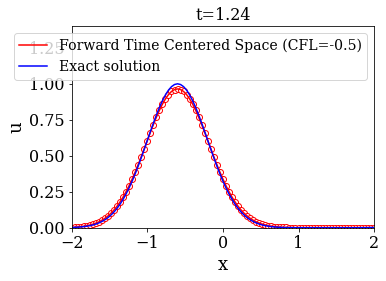

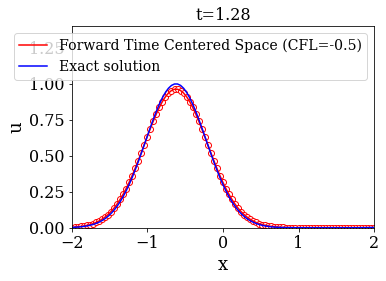

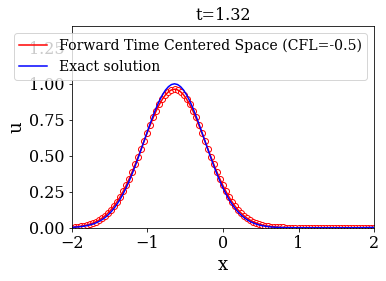

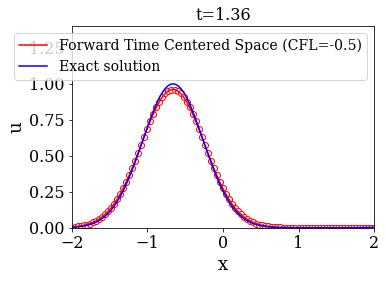

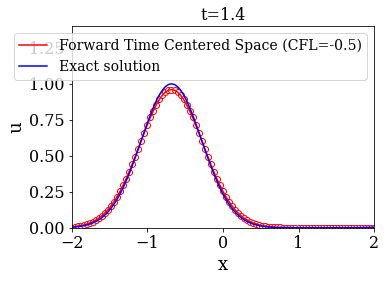

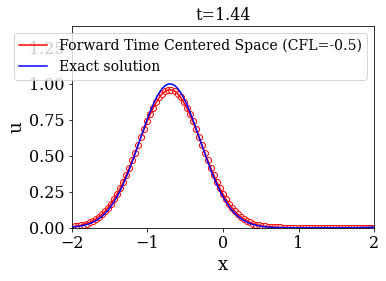

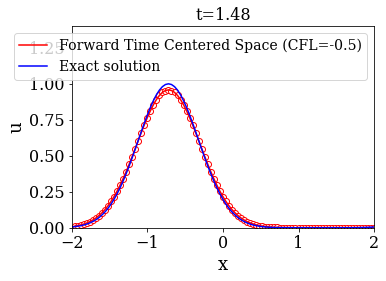

In [66]:
U= Upwind(Xl, Xr, Nx, T, dt, a)

[Uex, errL2_upwind] = Exact_sol(Xl, Xr, Nx, T, dt, a, U)
dx = (Xr-Xl)/(Nx-1)           # Mesh size
x = np.linspace(Xl, Xr, Nx)
CFL = a*dt/dx 

Fequency = 10; # HOW OFTEN you want to SHOW plots On screen, More often means more run time. 

for n in range (0, int(T/dt), Fequency):
    if (n==0): fig, ax = plt.subplots(figsize=(5.5,4))
    plt.clf()
    plt.plot(x,U[n,:], color='r')
    plt.plot(x,Uex[n,:], color='b')
    plt.scatter(x, U[n, :], marker='o', facecolors='white', color='r')

  #  plt.scatter(x,Uex[n, :], marker='o', facecolors='white', color='k')
    plt.gca().legend(('Forward Time Centered Space (CFL='+str(CFL)+')','Exact solution'))
    plt.axis([Xl, Xr, 0, 1.4])
    plt.title('t='+str(round(dt*(n+1),3)),fontsize=16)
    plt.xlabel('x',fontsize=18)
    plt.ylabel('u',fontsize=18)
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.18)
    plt.draw()
    plt.pause(0.001)

    plt.show()

fig.savefig("Upwind-figure.pdf", dpi=300)



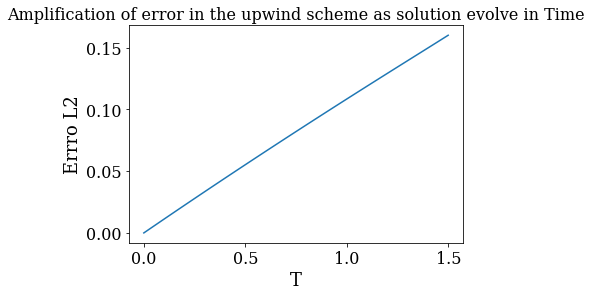

In [69]:
plt.title('Amplification of error in the upwind scheme as solution evolve in Time',fontsize=16)
plt.xlabel('T',fontsize=18)
plt.ylabel('Errro L2',fontsize=18)
plt.plot(np.linspace(0, T, len(errL2_upwind)), errL2_upwind)
plt.show()

# Tasks
1. Run the above codes for CFL < 1 and CFL ==1 and CFL > 1 and comment about the solutions and Error.
1. Write few lines about the stability of FTCS schecme.
2. Write few lines about the stabiliyt of Upwind scheme, which has better accuracy?
3. Use different type of wave as initial condition for example square wave
